In [1]:
# Import Libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from keras import Model,Sequential,layers,activations
from keras.layers import Dense,BatchNormalization,LeakyReLU,Dropout
from sklearn.model_selection import train_test_split
from datetime import datetime
from keras import callbacks
from sklearn import metrics

Using TensorFlow backend.


In [22]:
# Read Data
data=pd.read_csv(r'D:\Mayurs\UM-Dearborn\Subjects\IMSE 514\Project\PreProcessedData_std_1.csv')
y=data.pop('BCResponse')
X=data

#Remove ICD1
X.pop('ICD1') 

0        0.681818
1        0.818182
2        0.681818
3        0.045455
4        0.954545
           ...   
10175    0.818182
10176    0.272727
10177    0.727273
10178    0.863636
10179    0.090909
Name: ICD1, Length: 10180, dtype: float64

In [23]:
# COnvert Data to Categories for discrete variables

for col in ['ICD2','surgeon1','surgeon2','anestethist','scrubNurse']:
    X[col] = X[col].astype('category')

In [24]:
#Split Data into Train and Test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
# Write to TensorBoard
logdir = r"C:\Users\mayur\Desktop\imse_514_project\logs\scalars\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = callbacks.TensorBoard(log_dir=logdir)

#Define Model
model1=Sequential()

model1.add(Dense(64,activation='relu',input_shape=(11,)))
model1.add(BatchNormalization())

model1.add(Dense(16,activation='relu',input_shape=(11,)))
model1.add(BatchNormalization())

model1.add(Dense(10,activation='relu',input_shape=(11,)))
model1.add(BatchNormalization())

model1.add(Dense(1))

In [64]:
# check model and number of parameters. Parameters hosuld be less than 50% of train set
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                768       
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1040      
_________________________________________________________________
batch_normalization_5 (Batch (None, 16)                64        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
_________________________________________________________________
batch_normalization_6 (Batch (None, 10)                40        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total para

In [65]:
#compile model

model1.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [66]:
#Fit model 
model1.fit(X_train,y_train,epochs=100,batch_size=50,validation_split=0.2,callbacks=[tensorboard_callback])

Train on 6515 samples, validate on 1629 samples
Epoch 1/100
6515/6515 [==============================] - 1s 192us/step - loss: 112.2799 - mean_absolute_error: 10.5002 - val_loss: 94.5529 - val_mean_absolute_error: 9.6873
Epoch 2/100
6515/6515 [==============================] - 0s 42us/step - loss: 90.2179 - mean_absolute_error: 9.4505 - val_loss: 81.6707 - val_mean_absolute_error: 9.0149
Epoch 3/100
6515/6515 [==============================] - 0s 41us/step - loss: 61.5096 - mean_absolute_error: 7.7869 - val_loss: 52.4651 - val_mean_absolute_error: 7.2018
Epoch 4/100
6515/6515 [==============================] - 0s 41us/step - loss: 33.4279 - mean_absolute_error: 5.6938 - val_loss: 21.4263 - val_mean_absolute_error: 4.6109
Epoch 5/100
6515/6515 [==============================] - 0s 41us/step - loss: 13.8641 - mean_absolute_error: 3.6072 - val_loss: 7.8900 - val_mean_absolute_error: 2.6977
Epoch 6/100
6515/6515 [==============================] - 0s 47us/step - loss: 4.3917 - mean_absolute

6515/6515 [==============================] - 0s 43us/step - loss: 0.3126 - mean_absolute_error: 0.4506 - val_loss: 0.0638 - val_mean_absolute_error: 0.1654
Epoch 50/100
6515/6515 [==============================] - 0s 41us/step - loss: 0.3626 - mean_absolute_error: 0.4729 - val_loss: 0.0617 - val_mean_absolute_error: 0.1670
Epoch 51/100
6515/6515 [==============================] - 0s 41us/step - loss: 0.3289 - mean_absolute_error: 0.4595 - val_loss: 0.1316 - val_mean_absolute_error: 0.2392
Epoch 52/100
6515/6515 [==============================] - 0s 42us/step - loss: 0.3747 - mean_absolute_error: 0.4740 - val_loss: 0.0599 - val_mean_absolute_error: 0.1690
Epoch 53/100
6515/6515 [==============================] - 0s 41us/step - loss: 0.3857 - mean_absolute_error: 0.4797 - val_loss: 0.1040 - val_mean_absolute_error: 0.2247
Epoch 54/100
6515/6515 [==============================] - 0s 44us/step - loss: 0.3489 - mean_absolute_error: 0.4540 - val_loss: 0.0957 - val_mean_absolute_error: 0.2160

6515/6515 [==============================] - 0s 45us/step - loss: 0.3223 - mean_absolute_error: 0.4478 - val_loss: 0.1336 - val_mean_absolute_error: 0.2496
Epoch 98/100
6515/6515 [==============================] - 0s 42us/step - loss: 0.3494 - mean_absolute_error: 0.4725 - val_loss: 0.1199 - val_mean_absolute_error: 0.2539
Epoch 99/100
6515/6515 [==============================] - 0s 43us/step - loss: 0.3016 - mean_absolute_error: 0.4446 - val_loss: 0.0925 - val_mean_absolute_error: 0.2453
Epoch 100/100
6515/6515 [==============================] - 0s 44us/step - loss: 0.3470 - mean_absolute_error: 0.4786 - val_loss: 0.0610 - val_mean_absolute_error: 0.1749


In [67]:
#Evaluate Model on Test Data
mse,mae=model1.evaluate(X_test,y_test,verbose=False)
print(f"MSE={mse} and MAE ={mae}")

MSE=0.06203246993069447 and MAE =0.17549182943019043


tensorboard --logdir=logs/scalar --host localhost

In [68]:
#Save predictions on Test Data

results=model1.predict(X_test)
y_test=np.array(y_test)

In [69]:
# Convert back to original space from box cox

trans_results=((results*0.43)+1)**(1/0.43)
trans_y_test=((y_test*0.43)+1)**(1/0.43)

# write data frame
compiled_results=pd.DataFrame(columns=['y_test','results'])
compiled_results['y_test']=trans_y_test
compiled_results['results']=trans_results

#Find null values and replace them by zeroes

index=np.argwhere(np.isnan(trans_results))
for value in index:
    indices=value[0]
    trans_results[indices]=0
    trans_y_test[indices]=0
    
#Write results

r2=metrics.r2_score(trans_y_test,trans_results)
mae=metrics.mean_absolute_error(trans_y_test,trans_results)
mse=metrics.mean_squared_error(trans_y_test,trans_results)
print(f"R-squared = {r2}\n MAE = {mae}\n MSE = {mse}")

R-squared = 0.993760914878027
 MAE = 1.616919331570498
 MSE = 10.036420189544328


In [70]:
#Show results
compiled_results

,y_test,results
0,105.0,101.927345
1,40.0,40.584927
2,110.0,107.076424
3,50.0,48.770260
4,21.0,22.730080
...,...,...
2031,51.0,49.562195
2032,246.0,244.356293
2033,105.0,102.170578
2034,31.0,32.140343


In [71]:
# Descriptive Staistics

compiled_results['abs_error']=abs(compiled_results['y_test']-compiled_results['results'])
compiled_results['error']=(compiled_results['y_test']-compiled_results['results'])
error=compiled_results['error']
abs_error=compiled_results['abs_error']

error=np.nan_to_num(error,0)
abs_error=np.nan_to_num(abs_error,0)

abs_error=np.sort(abs_error)
for pc in [25,50,75]:
    print(f'\n {pc}%ile of abs errors is {np.percentile(abs_error,pc)}')
    
print(f'\n 90% of abs errors is between {np.percentile(abs_error,5)} and {np.percentile(abs_error,95)}')
print(f'\n 90% of errors is between {np.percentile(error,5)} and {np.percentile(error,95)}')


 25%ile of abs errors is 0.55710317246713

 50%ile of abs errors is 1.239650731736166

 75%ile of abs errors is 2.144885542748195

 90% of abs errors is between 0.12276652990149017 and 3.1072292526865404

 90% of errors is between -2.239794493027844 and 3.063694068754984


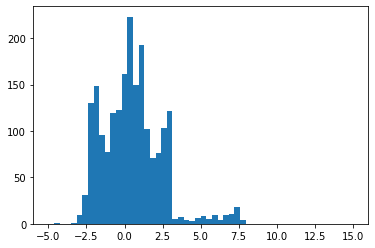

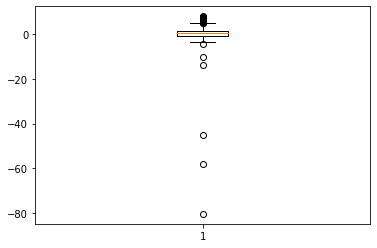

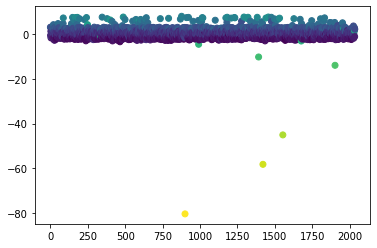

In [72]:
#Display Plots
plt.hist(error,bins='auto',range=(-5,15))
plt.show()

plt.boxplot(error)
plt.show()


index=compiled_results.index

plt.scatter(index,error,c=trans_y_test)
plt.show()

In [73]:
#Difference between means of predicted and actual values

diff=abs(compiled_results['y_test'].mean()-compiled_results['results'].mean())
print(f"Difference between means={diff}")

Difference between means=0.38605508229909447


In [74]:
#Save model

model1.save('./model1_99.h5')

In [85]:
compiled_results[compiled_results['abs_error']>8]

,y_test,results,abs_error,error
900,410.0,490.374207,80.374206,-80.374206
1392,285.0,295.238342,10.238342,-10.238342
1421,380.0,438.223022,58.223022,-58.223022
1554,360.0,405.072601,45.072601,-45.072601
1903,295.0,308.964905,13.964905,-13.964905
